# Deep learning models for Data Augmentation

## Import lib and read data

In [1]:
import numpy as np
import pandas as pd 
import Augmentor
# import matplotlib as mpl   
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.signal import find_peaks, savgol_filter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LeakyReLU, BatchNormalization, MaxPooling1D, Dropout
# from keras.utils import to_categorical
# import glob

In [10]:
data = pd.read_csv("../input/data.csv")

In [4]:
display(data.head().T, data.shape)

,0,1,2,3,4
320,-1.388896,16.722093,0.329687,-10.598846,10.015236
321,0.05821,-1.186429,-0.747993,-5.978379,12.575455
322,5.898464,-10.186022,-1.588051,1.822014,13.012607
323,5.849397,-3.832706,0.152671,12.90642,13.932454
324,2.37903,12.73007,5.357345,21.049637,13.677982
...,...,...,...,...,...
1648,1.384356,-4.633642,-5.380405,10.001486,35.561525
1649,16.59277,-6.431111,-6.852814,1.22302,37.348663
1650,8.760738,25.847542,-2.682321,1.914469,11.53166
Diagnostic,Streptavidin,Streptavidin,Streptavidin,S,S


(35, 1333)

## Data prep

In [ ]:
def data_preprocessing(data):

    X = data.drop(['Diagnostic', 'COVID-19_Status'], axis=1)
    X.columns = X.columns.astype(int)
    y = data['Diagnostic'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    label_encoder = OneHotEncoder(sparse_output=False)
    y_train_encoded = label_encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_encoded = label_encoder.transform(y_test.reshape(-1, 1))

    return X_train, X_test, y_train_encoded, y_test_encoded

In [16]:
def data_preprocessing_bin(data):

    X = data.drop(['Diagnostic', 'COVID-19_Status'], axis=1)
    X.columns = X.columns.astype(int)
    y = data['COVID-19_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    return X_train, X_test, y_train_encoded, y_test_encoded

In [30]:
X = data.drop(['Diagnostic', 'COVID-19_Status'], axis=1)
X.columns = X.columns.astype(int)
y_diagnostic = data['Diagnostic']
y_covid_status = data['COVID-19_Status']

wavelength = X.columns
intensity = X.values

### Augmentatoin

In [33]:
def plot_spectral_data(wavelength, intensity, label):
    fig, ax = plt.subplots(facecolor='#242424')

    sns.lineplot(x=wavelength, y=intensity, ax=ax, label=f'{label}')
    ax.set_title("Раман спектр өгөгдлийн дээж 1", color='white')
    ax.set_xlabel('Долгионы урт', color='white')
    ax.set_ylabel('Intensity', color='white')
    ax.legend()

    plt.show()

In [3]:
# def apply_noise(data, percentage_noise=5):
#     noise = np.random.normal(0, percentage_noise * 0.01 * np.max(data), data.shape)
#     return data + noise

In [19]:
def apply_noise(data, noise_factor=0.01):
    noise = np.random.normal(0, noise_factor, data.shape)
    return data + noise

In [4]:
def apply_scaling(data, scale_factor_range=(0.8, 1.2)):
    scale_factor = np.random.uniform(*scale_factor_range)
    return data * scale_factor

In [5]:
def apply_shifting(data, shift_range=(-10, 10)):
    shift_value = np.random.randint(*shift_range)
    return np.roll(data, shift_value)

In [6]:
def apply_smoothing(data, window_size=5):
    kernel = np.ones(window_size) / window_size
    return np.convolve(data, kernel, mode='same')

In [ ]:
# def augment_data(original_data, num_augmented_samples=100):
#     augmented_data = []

#     for _ in range(num_augmented_samples):
#         augmented_sample = apply_noise(original_data)
#         augmented_sample = apply_scaling(augmented_sample)
#         augmented_sample = apply_shifting(augmented_sample)
#         augmented_sample = apply_smoothing(augmented_sample)

#         augmented_data.append(augmented_sample)

#     return np.array(augmented_data)

In [35]:
def augment_data(original_data, num_augmented_samples=1):
    augmented_data = []

    for _ in range(num_augmented_samples):
        augmented_data.append(apply_noise(original_data))
        augmented_data.append(apply_scaling(original_data))
        augmented_data.append(apply_shifting(original_data))
        augmented_data.append(apply_smoothing(original_data))

    return np.array(augmented_data)

In [43]:
original_sample = intensity[0]

# plot_spectral_data(wavelength, original_sample, 'Original Spectral Data')

augmented_samples = augment_data(original_sample, num_augmented_samples=1)

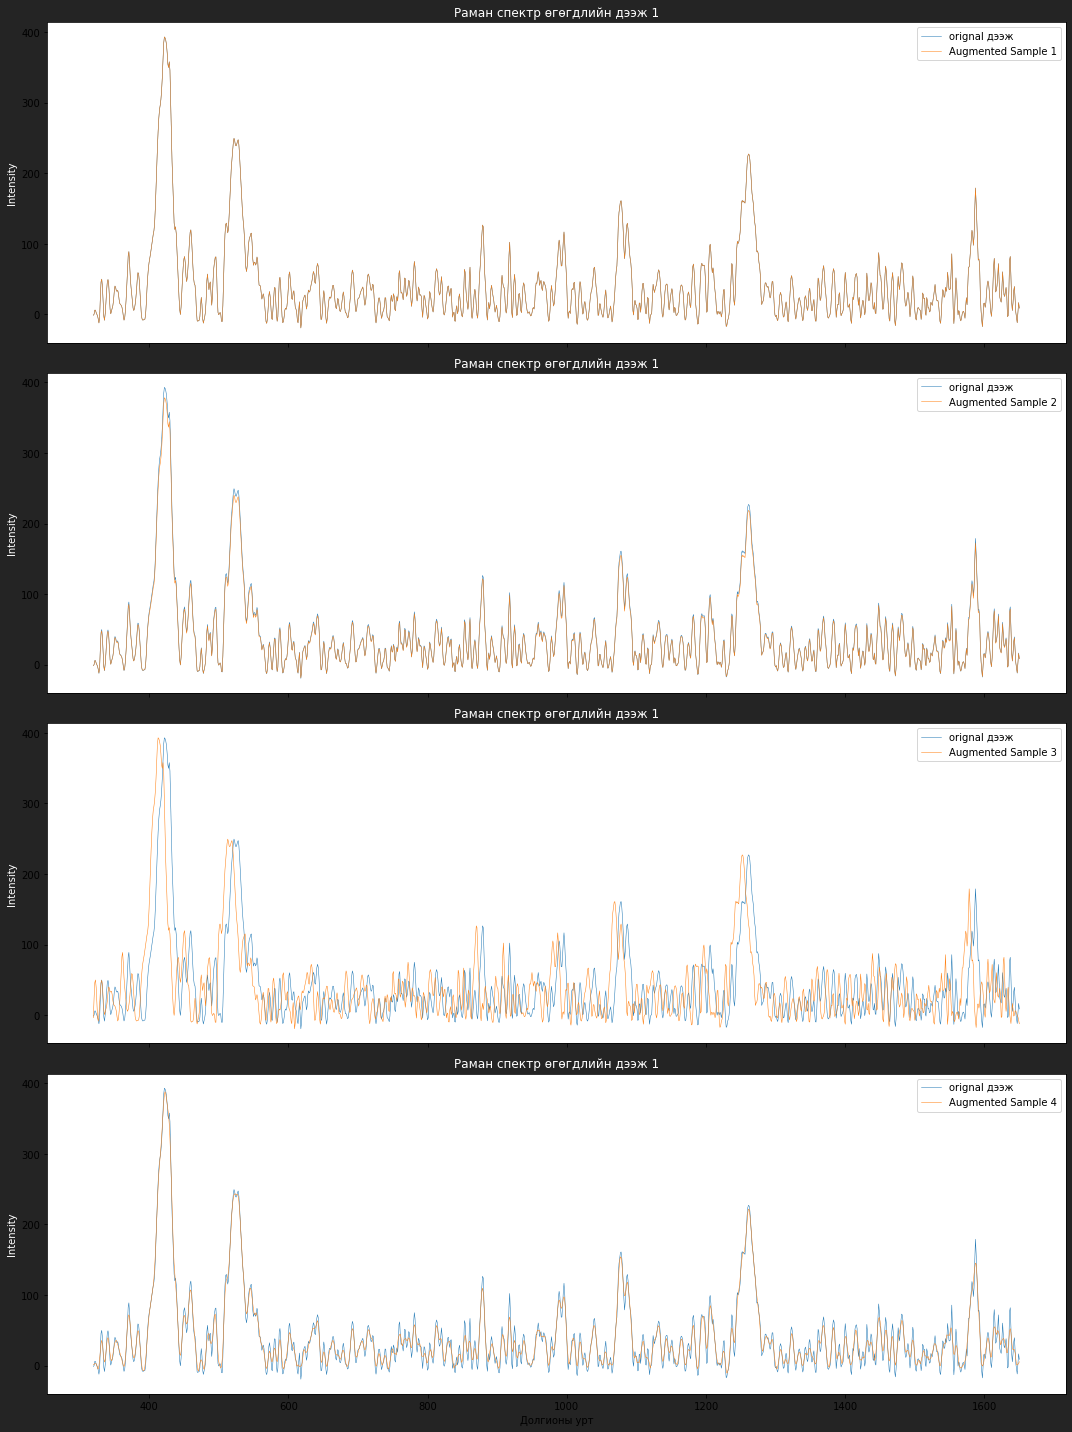

In [50]:
fig, axs = plt.subplots(len(augmented_samples), facecolor='#242424', sharex=True, figsize=(15, 20))

for i, augmented_sample in enumerate(augmented_samples):
    # sns.lineplot(x=wavelength, y=original_sample, label=f'Original Spectral Data')
    axs[i].plot(wavelength, original_sample, linewidth=0.5, label=f'orignal дээж')
    axs[i].set_title("Раман спектр өгөгдлийн дээж 1", color='white')

    # sns.lineplot(x=wavelength, y=augmented_sample, label=f'Augmented Sample {i+1}')
    axs[i].plot(wavelength, augmented_sample, linewidth=0.5, label=f'Augmented Sample {i+1}')
    axs[i].set_ylabel('Intensity', color='white')
    axs[i].legend()

axs[len(augmented_samples) - 1].set_xlabel('Долгионы урт')
plt.tight_layout()
plt.show()

## GAN (Generative Adversial Network)

In [ ]:
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [ ]:
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, input_shape=input_shape, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator during GAN training

    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)

    return model

In [ ]:
def train_gan(generator, discriminator, gan, data, latent_dim, epochs=10000, batch_size=32):
    for epoch in range(epochs):
        # Generate random noise as input to the generator
        noise = tf.random.normal((batch_size, latent_dim))

        # Generate fake samples
        fake_samples = generator.predict(noise)

        # Select a random batch of real samples
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_samples = data[idx]

        # Labels for real and fake samples
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = tf.random.normal((batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

In [ ]:
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((X_train.shape[1],))
gan = build_gan(generator, discriminator)

train_gan(generator, discriminator, gan, X_train, latent_dim)

## Others

## Report